In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers,models,datasets
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
'''we cant write it as -# (x_train,x_test),(y_train,y_test)=datasets.fashion_mnist.load_data()
because this data return first values then labels'''

'we cant write it as -# (x_train,x_test),(y_train,y_test)=datasets.fashion_mnist.load_data()\nbecause this data return first values then labels'

In [6]:
len(x_train),len(y_train),len(x_test),len(y_test)

(60000, 60000, 10000, 10000)

In [35]:
# as scaling help in that as gradient descent krta hi hai reduce weigths by loss calculation so use here
x_train_scaled=x_train/255
x_test_scaled=x_test/255
x_train_scaled=x_train_scaled.reshape((60000,28,28,1))
x_test_scaled=x_test_scaled.reshape((10000,28,28,1))# 1 for greyscale
y_train=y_train.reshape((60000,1))
y_test=y_test.reshape((10000,1))
x_train_scaled.shape,x_test_scaled.shape,y_train.shape,y_test.shape
# as kaam toh x_train aur test mein hi h y tohnoutput hai

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 1), (10000, 1))

In [20]:
classes= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [22]:
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

Text(0.5, 1.0, 'Ankle boot')

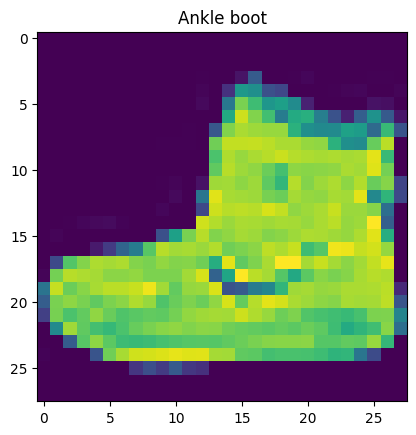

In [23]:

plt.imshow(x_train_scaled[0])
plt.title(classes[y_train[0][0]])

In [25]:
x_train_scaled.shape

((60000, 28, 28, 1), (60000, 1))

In [37]:
y_train.shape

(60000,)

In [11]:
'''CNN rewuires our data to be of 4 dimension'''

'CNN rewuires our data to be of 4 dimension'

In [40]:

model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7607 - loss: 0.6588
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8823 - loss: 0.3256
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8995 - loss: 0.2724
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9115 - loss: 0.2381
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9231 - loss: 0.2099
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9326 - loss: 0.1842
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9415 - loss: 0.1611
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9488 - loss: 0.1417
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9539 - loss: 0.1264
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9579 - loss: 0.1143


In [44]:
model.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8949 - loss: 0.3864


[0.36221078038215637, 0.8964999914169312]

In [47]:
pred=model.predict(x_test_scaled)
y=[np.argmax(i) for i in pred]
y[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1034
           1       0.98      0.99      0.99       987
           2       0.82      0.84      0.83       978
           3       0.84      0.94      0.89       890
           4       0.91      0.76      0.83      1198
           5       0.95      0.99      0.97       956
           6       0.67      0.75      0.71       883
           7       0.98      0.93      0.95      1044
           8       0.99      0.96      0.97      1033
           9       0.97      0.97      0.97       997

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [60]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[863,   0,  24,  11,   8,   0,  85,   0,   9,   0],
       [  3, 979,   1,  10,   3,   0,   2,   0,   2,   0],
       [ 17,   0, 825,   6,  92,   0,  56,   0,   4,   0],
       [ 22,   6,  14, 837,  81,   0,  34,   0,   6,   0],
       [  0,   1,  39,   7, 914,   0,  37,   0,   2,   0],
       [  0,   0,   0,   0,   0, 951,   1,  35,   5,   8],
       [125,   1,  73,  18, 100,   0, 665,   0,  18,   0],
       [  0,   0,   0,   0,   0,   3,   0, 976,   0,  21],
       [  3,   0,   2,   1,   0,   0,   3,   4, 987,   0],
       [  1,   0,   0,   0,   0,   2,   0,  29,   0, 968]])>

<Axes: >

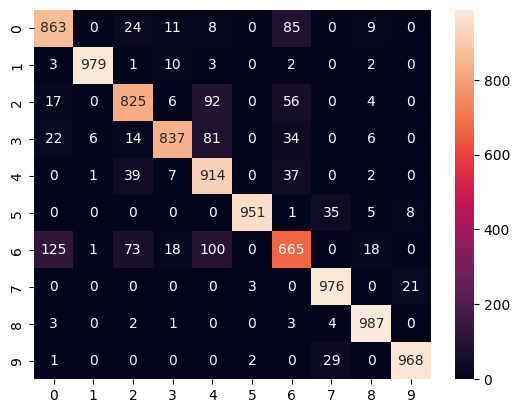

In [61]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')